In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler

C:\Users\duasp\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
inpDir = os.path.join( '..', 'input')


###moduleDir = 'MACHINE LEARNING'

outDir = os.path.join('output')


# define and set random state 
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results
rng = np.random.default_rng(seed = RANDOM_STATE)

NOISE = 0.2
N_SAMPLES = 1000
ALPHA = 0.1     # learning rate
EPOCHS = 5000

# parameters for Matplotlib
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large',
          'savefig.dpi': 150,
          'image.cmap': 'jet',
          'image.interpolation': 'none',
          'savefig.bbox' : 'tight',
          'lines.linewidth' : 2,
          'legend.numpoints' : 1
         }
CMAP = plt.cm.rainbow
plt.rcParams.update(params);
plt.set_cmap(CMAP);
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

TEST_SIZE=0.2

<Figure size 1500x600 with 0 Axes>

In [3]:
# parameters for Matplotlib
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large',
          'savefig.dpi': 75,
          'image.cmap': 'jet',
          'image.interpolation': 'none',
          'savefig.bbox' : 'tight',
          'lines.linewidth' : 1,
          'legend.numpoints' : 1
         }


plt.rcParams.update(params)

'''plt.rc('axes', prop_cycle=(
    cycler('color', mglearn.plot_helpers.cm_cycle.colors) +
    cycler('linestyle', ['-', '-', "--", (0, (3, 3)), (0, (1.5, 1.5))])))
'''
np.set_printoptions(precision=3, suppress=True)

pd.set_option("display.max_columns", 8)
pd.set_option('display.precision', 2)

__all__ = ['np', 'display', 'plt', 'pd', 'sklearn', 'seaborn']

In [4]:
X, y = datasets.make_moons(n_samples = N_SAMPLES, shuffle = True, noise = NOISE, random_state = RANDOM_STATE)

X[:5], y[:5]

(array([[ 0.906,  0.903],
        [-1.115,  0.756],
        [ 1.888,  0.418],
        [-0.933, -0.023],
        [-0.969,  0.064]]),
 array([0, 0, 1, 0, 0], dtype=int64))

In [5]:
df = pd.DataFrame(X, columns = ['A','B'])

df['target'] = y

df.head()

,A,B,target
0,0.91,0.90,0
1,-1.12,0.76,0
2,1.89,0.42,1
3,-0.93,-0.02,0
4,-0.97,0.06,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1000 non-null   float64
 1   B       1000 non-null   float64
 2   target  1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [7]:
df.describe()

,A,B,target
count,1000.00,1000.00,1000.0
mean,0.49,0.24,0.5
std,0.90,0.54,0.5
min,-1.69,-0.96,0.0
25%,-0.15,-0.21,0.0
50%,0.50,0.24,0.5
75%,1.10,0.68,1.0
max,2.42,1.61,1.0


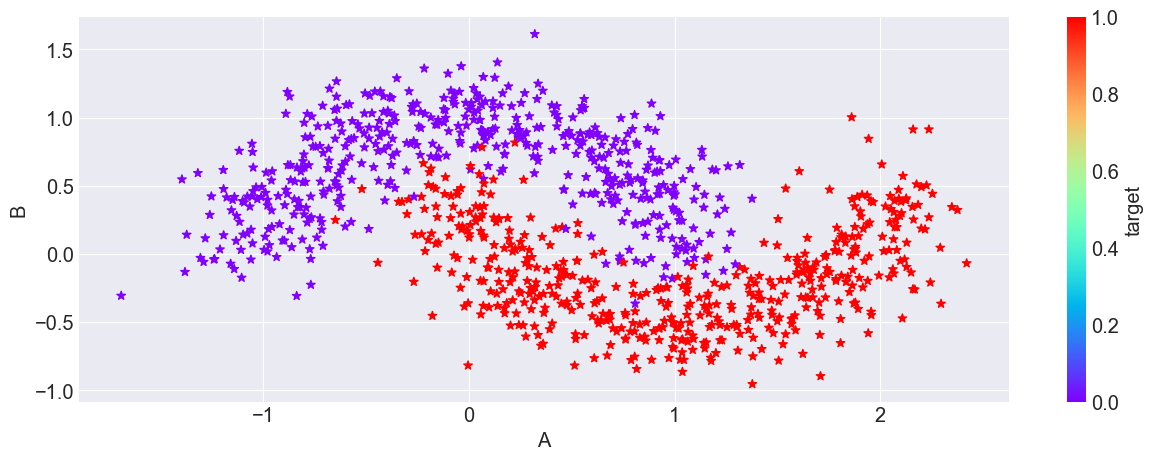

In [8]:
df.plot.scatter('A','B',
               s = 40,
               marker = '*',
               c = 'target',
               cmap = CMAP);

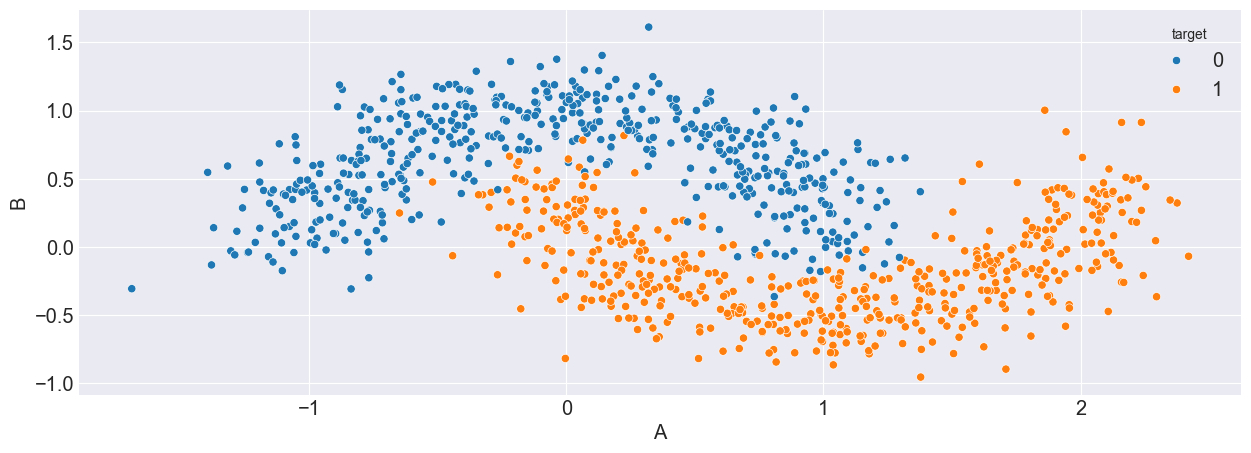

In [9]:
ax = sns.scatterplot(x = 'A', y = 'B',data = df, hue = 'target');

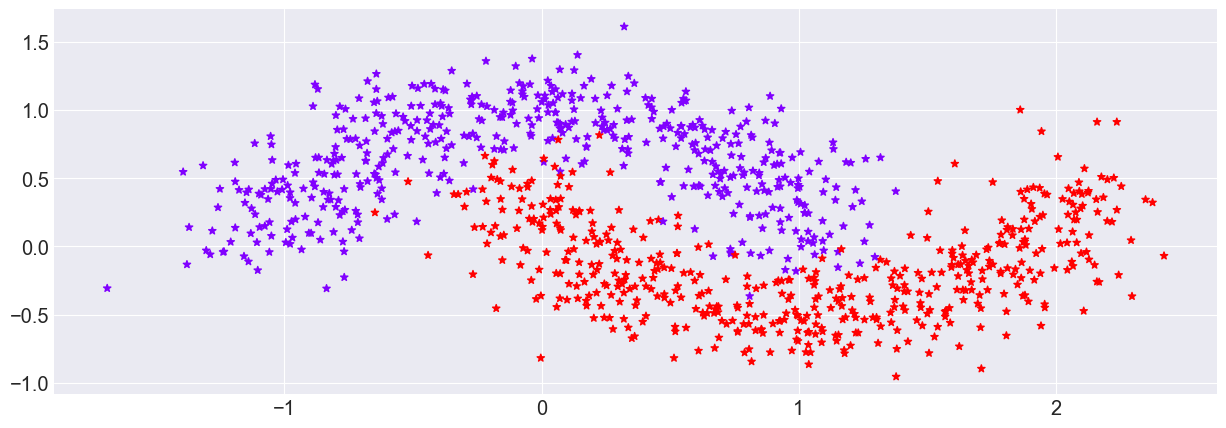

In [10]:
plt.scatter(X[:,0], X[:,1], s = 30 , c = y, marker = '*', cmap = CMAP);

In [11]:
# Splitting in train and test dataset. Type will be numpy array
X_train, X_test = X[:900], X[900:]

y_train, y_test = y[:900], y[900:]

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(type(X_train), type(X_test))

(900, 2) (100, 2) (900,) (100,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [12]:
sc = MinMaxScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.fit_transform(X_test)

### Activation Function

In [13]:
def fn_sigmoid(z : np.ndarray) -> np.float64:
    '''
    Args:
        z : a matrix of z values of shape(m, n_output)
    returns:
        a matrix containing sigmoid values of z
    '''
    
    return 1 / (1 + np.exp(-z))

In [14]:
sm = fn_sigmoid(np.asarray([-np.inf, -1, 0., 1., np.inf]))
print(sm)

[0.    0.269 0.5   0.731 1.   ]


In [15]:
# A function to make predictions

def fn_predict(X: np.ndarray, W: np.ndarray, b: np.int64) -> np.ndarray:
    
    '''
    Args:
        row: one data row
        weights: array with w1 and w2.
        b: bias
    return:
        as per sigmoid activation function
    '''
    
    # calculate z = X * W + b
    z = X.dot(W) + b
    
    return fn_sigmoid(z)

In [16]:
weights = [2.0, 1.0]
bias = 1.0
display(X)

fn_predict(X_train, weights, bias)

array([[ 0.906,  0.903],
       [-1.115,  0.756],
       [ 1.888,  0.418],
       ...,
       [ 0.285,  0.794],
       [ 1.713, -0.178],
       [-0.959,  0.538]])

array([0.952, 0.874, 0.963, 0.848, 0.85 , 0.922, 0.904, 0.939, 0.871,
       0.913, 0.92 , 0.948, 0.96 , 0.957, 0.921, 0.918, 0.863, 0.958,
       0.967, 0.966, 0.926, 0.899, 0.952, 0.856, 0.961, 0.912, 0.965,
       0.947, 0.946, 0.926, 0.962, 0.945, 0.913, 0.893, 0.912, 0.929,
       0.942, 0.918, 0.925, 0.948, 0.945, 0.899, 0.909, 0.897, 0.94 ,
       0.909, 0.917, 0.93 , 0.962, 0.957, 0.951, 0.907, 0.966, 0.931,
       0.921, 0.895, 0.917, 0.963, 0.909, 0.88 , 0.874, 0.939, 0.907,
       0.921, 0.775, 0.948, 0.932, 0.943, 0.926, 0.948, 0.94 , 0.882,
       0.887, 0.902, 0.949, 0.904, 0.851, 0.949, 0.952, 0.908, 0.937,
       0.901, 0.902, 0.914, 0.912, 0.909, 0.944, 0.934, 0.904, 0.905,
       0.904, 0.919, 0.855, 0.96 , 0.924, 0.907, 0.905, 0.923, 0.924,
       0.942, 0.94 , 0.94 , 0.953, 0.961, 0.937, 0.94 , 0.889, 0.932,
       0.944, 0.928, 0.915, 0.961, 0.888, 0.916, 0.939, 0.905, 0.935,
       0.937, 0.941, 0.921, 0.89 , 0.899, 0.906, 0.913, 0.882, 0.942,
       0.909, 0.967,

In [17]:
def train_weights(X : np.ndarray, y : np.ndarray, alpha : np.float64, n_epoch: np.int64):

    errors = []
    
    weights = rng.random(X.shape[1])
    bias = 0
    
    m = X.shape[0]
    
    for epoch in range(n_epoch):
        a = fn_predict(X, weights, bias)      # calculate activation
        
        error = -y * np.log(a)    # cross entropy
        
        #print(f'Shape of a: {a.shape}')
        dz = a - y
        #print(f'Shapeof y: {y.shape}')
        #print(f'Shape of dz: {dz.shape}')
        
        sum_error = error.sum()
        
        db = alpha * np.sum(dz) / m
        bias = bias - db
        dw = alpha * (X.T).dot(dz) / m
        weights = weights - dw
        assert(weights.shape == dw.shape), f'Shape of Weights{weights.shape},dw{dw.shape}'
        errors.append(sum_error / m)
        
    return errors, weights, bias

In [18]:
alpha = ALPHA

n_epoch = EPOCHS

errors, weights, bias = train_weights(X_train, y_train, alpha, EPOCHS)

print(weights)

[ 4.868 -8.614]


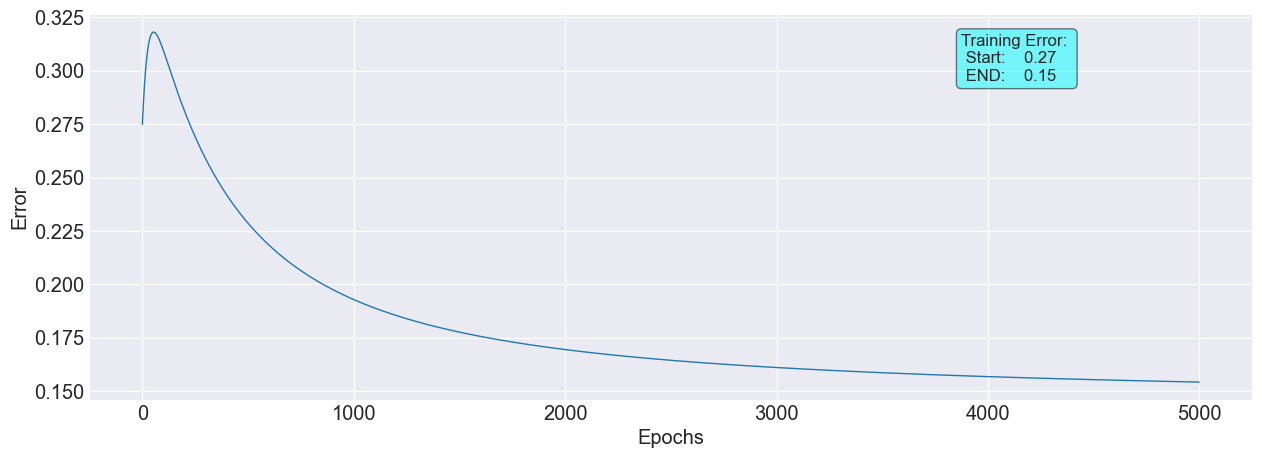

In [19]:
fig, ax = plt.subplots()
ax.plot(errors);

txtstr = 'Training Error: \n Start: {:7.2f}\n END: {:7.2f}'.format(errors[0], errors[-1])

props = dict(boxstyle = 'round', facecolor = 'cyan', alpha = 0.5)

ax.text(0.75, 0.95, txtstr, transform = ax.transAxes, fontsize = 12,
       verticalalignment = 'top', bbox = props)

ax.set_xlabel('Epochs')
ax.set_ylabel("Error");

### Predictions

In [20]:
a = fn_predict(X_train, weights, bias)
y_pred = a >= 0.5

In [21]:
accuracy_score(y_train, y_pred)

0.8644444444444445

In [22]:
a = fn_predict(X_test, weights, bias)
y_pred = a >= 0.5

In [23]:
accuracy_score(y_test, y_pred)

0.9

In [24]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[56,  2],
       [ 8, 34]], dtype=int64)

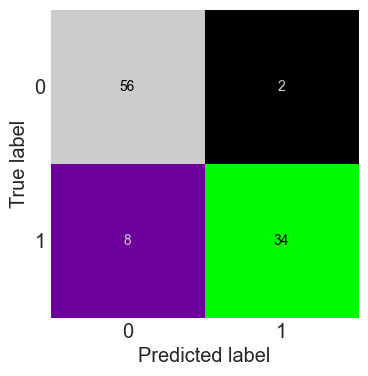

In [25]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                             display_labels = [0,1])

fig, ax = plt.subplots(figsize = (4,4))

disp.plot(ax = ax, cmap = 'nipy_spectral', colorbar = False)
plt.grid()
plt.show()

In [36]:
def fn_plot_decision_boundary(X_tr : np.ndarray,
                             X_ts : np.ndarray,
                             y_tr : np.ndarray,
                             y_ts : np.ndarray,
                             wts : np.ndarray = weights,
                             b  : np.int64 = bias):
    
    '''
    Args:
        X-tr : Training features
        X_ts : Testing features
        y_tr : Training labels
        y_ts : Testing labels
        wts : Weights
        b : bias
    '''
    
    fig, ax = plt.subplots(figsize = (15,12))
    ax.axes.set_aspect('equal')
    
    dm = 0.005
    margin = 0.01
    x_min, x_max = X_tr[:,0].min() - margin,X_tr[:,0].max()+ margin
    y_min, y_max = X_tr[:,1].min() - margin,X_tr[:,1].max()+ margin
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, dm),
                        np.arange(y_min, y_max, dm))
    
    XX = np.c_[xx.ravel(), yy.ravel()]
    
    a = fn_predict(XX,wts,b)
    
    y_pred = a>=0.5
    
    Z = np.array(y_pred).reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha = 0.6, cmap = plt.cm.Paired)
    
    ax.scatter(X_tr[:,0], X_tr[:,1], c=y_tr,
              s=30, edgecolor="k", cmap=CMAP)
    
    ax.scatter(X_ts[:,0], X_ts[:,1], c=y_ts,
              s=100, marker = '*', edgecolor="k", cmap = plt.cm.inferno)
    
    ax.set_title('Decision Boundary')
    ax.set_xlabel('A')
    ax.set_ylabel('B')
    plt.show()

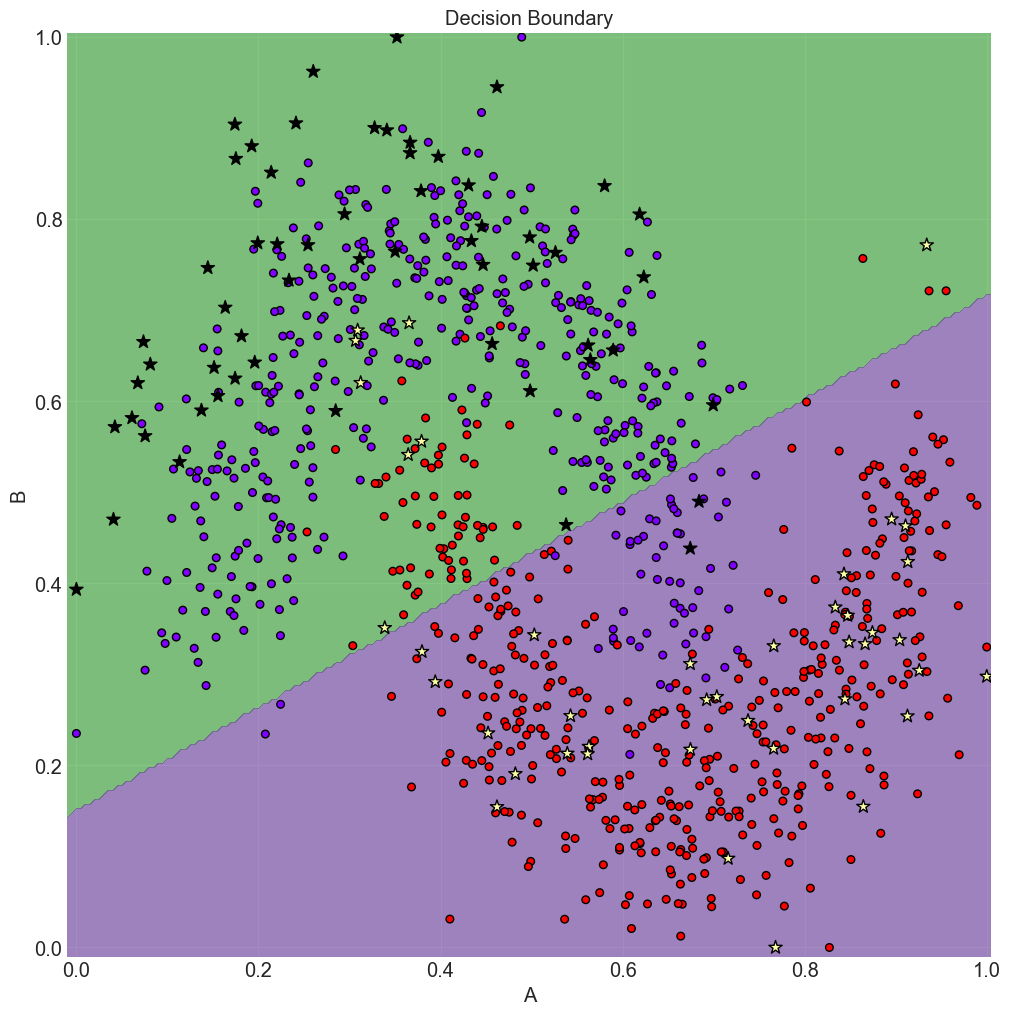

In [37]:
fn_plot_decision_boundary(X_train, X_test, y_train, y_test)